In [4]:
from config import api_key
from yelpapi import YelpAPI
import requests
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt

In [5]:
cities = ["Anaheim,CA", "Santa Ana,CA", "Irvine,CA", "Huntington Beach,CA", "Garden Grove,CA", "Orange,CA", "Fullerton,CA", "Costa Mesa,CA", "Mission Viejo,CA","Westminster,CA"]
url = "https://api.yelp.com/v3/businesses/search"
headers = {'Authorization': 'Bearer %s' %api_key}
price_locations = {}

for city in cities:
    locations={}
    params = {"term":"restaurant",
              "location":city,
              "limit":50,
             "radius":5000}
    responses=requests.get(url,headers = headers, params = params).json()
    for response in responses["businesses"]:
        try:
            money= response["price"]
            if money not in locations:
                locations[money]=1
                
            else:
                locations[money]+=1
        except KeyError:
            continue  
    price_locations[city]=locations 
    url_params = {"term":"restaurant",
                  "location":city,
                  "limit":50,
                 "offset":50,
                  "radius":5000}
    results = requests.get(url,headers = headers, params = url_params).json()
    for r in results["businesses"]:
        try:
            m = r["price"]
            if m not in locations:
                locations[m]=1
            else:
                locations[m]+=1
        except KeyError:
            continue
    price_locations[city]=locations
print(price_locations)        
     

{'Anaheim,CA': {'$$': 62, '$$$': 8, '$': 26, '$$$$': 3}, 'Santa Ana,CA': {'$$': 48, '$$$$': 1, '$': 49, '$$$': 1}, 'Irvine,CA': {'$$$': 2, '$$': 65, '$': 33}, 'Huntington Beach,CA': {'$$': 73, '$': 22, '$$$': 4}, 'Garden Grove,CA': {'$': 48, '$$': 49, '$$$$': 2}, 'Orange,CA': {'$$': 50, '$': 46, '$$$': 1, '$$$$': 2}, 'Fullerton,CA': {'$$': 60, '$': 35, '$$$': 2}, 'Costa Mesa,CA': {'$$': 67, '$': 26, '$$$': 4, '$$$$': 2}, 'Mission Viejo,CA': {'$': 40, '$$': 57, '$$$': 2}, 'Westminster,CA': {'$$': 40, '$': 59}}


In [6]:
columns = ["Cheap","Affordable","Expensive","Luxury"]
DF=pd.DataFrame.from_dict(price_locations).T #.T means transpose, switch columns and rows
DF = DF.reset_index()
# df.rename(columns = {'index':'City','$':'Cheap'}, inplace = True)
df = DF.rename(columns={"$":"Cheap","$$":"Affordable","$$$":"Expensive","$$$$":"Luxury","index":"City"})
# DF.to_csv("output.csv")

df = df.fillna(0)
df

,City,Cheap,Affordable,Expensive,Luxury
0,"Anaheim,CA",26.0,62.0,8.0,3.0
1,"Costa Mesa,CA",26.0,67.0,4.0,2.0
2,"Fullerton,CA",35.0,60.0,2.0,0.0
3,"Garden Grove,CA",48.0,49.0,0.0,2.0
4,"Huntington Beach,CA",22.0,73.0,4.0,0.0
5,"Irvine,CA",33.0,65.0,2.0,0.0
6,"Mission Viejo,CA",40.0,57.0,2.0,0.0
7,"Orange,CA",46.0,50.0,1.0,2.0
8,"Santa Ana,CA",49.0,48.0,1.0,1.0
9,"Westminster,CA",59.0,40.0,0.0,0.0


In [7]:
plt.rc('ytick', labelsize=25)
plt.rc('xtick', labelsize=25) 
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)

x_axis = np.arange(len(cities))
df.plot.bar(x_axis,alpha=0.7, align='edge', stacked=True, figsize=(25,10))

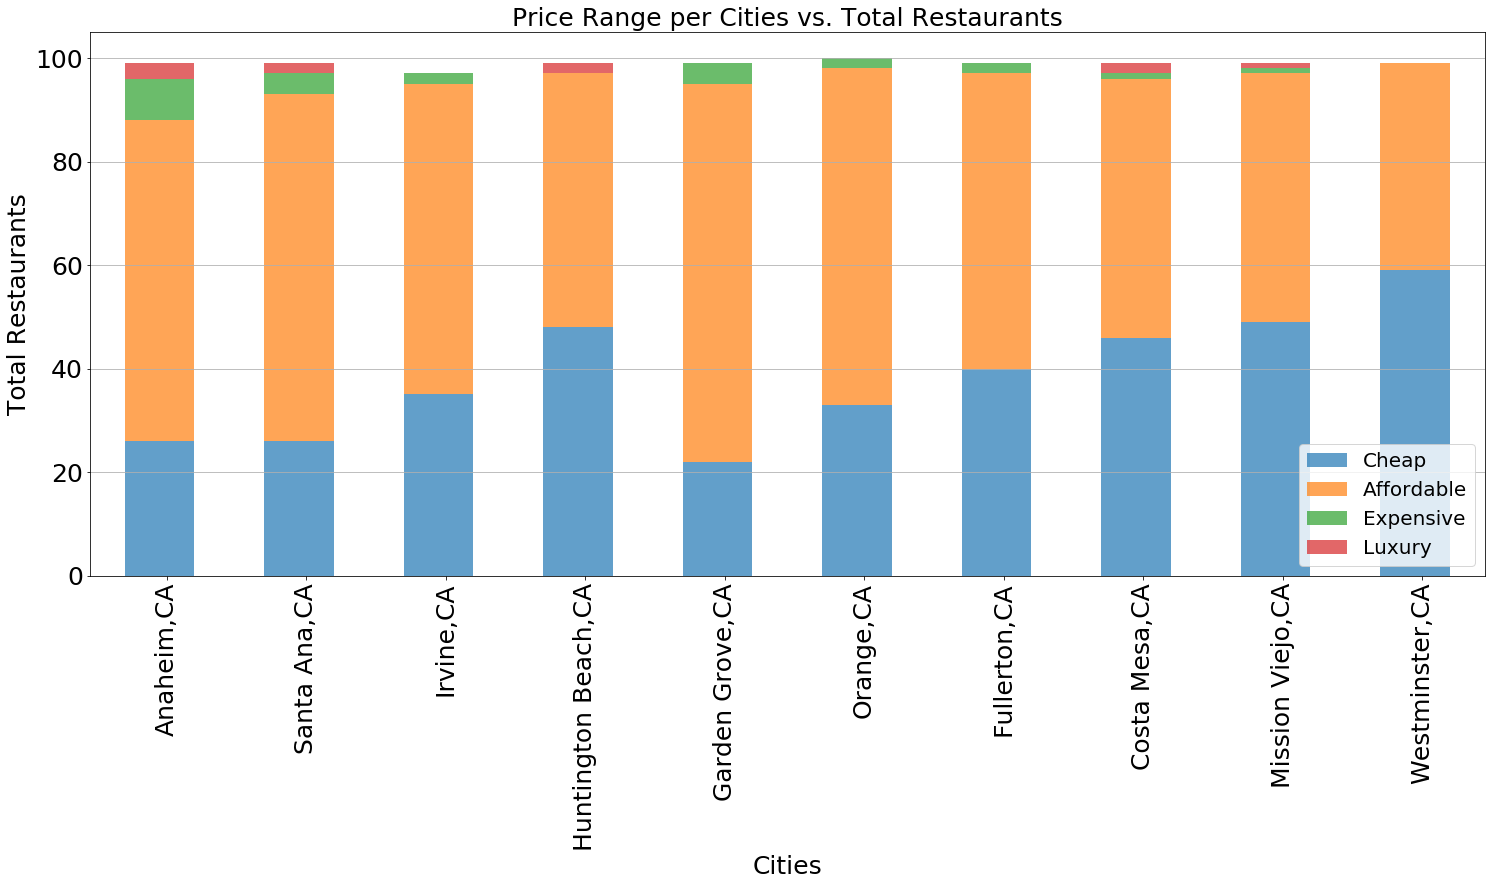

In [8]:
tick_locations = [value+0.3 for value in x_axis]
plt.xticks(tick_locations, cities)

plt.title('Price Range per Cities vs. Total Restaurants')
plt.xlabel('Cities')
plt.ylabel('Total Restaurants')
plt.legend(loc = 'lower right', fontsize=20)
plt.gca().yaxis.grid(True)
#plt.rcParams['axes.facecolor'] = 'lightgrey'
plt.show()